<a href="https://colab.research.google.com/github/HEM2058/Team_task_sharing_for_thesis/blob/main/NetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd

# Load GeoJSON file into a GeoDataFrame
file_path = "/content/drive/MyDrive/Network Analysis/waterpipelinegeo.geojson"
gdf = gpd.read_file(file_path)

# Check unique values in the "geometry" column
unique_geometry_types = gdf["geometry"].geom_type.unique()

# Print the unique geometry types
print("Unique Geometry Types:", unique_geometry_types)


Unique Geometry Types: ['Polygon' 'MultiLineString']


<ipython-input-13-22d31819ad91>:10: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  exploded_gdf = gdf.explode()


Streaming output truncated to the last 5000 lines.
Adding edge between (83.95842153922747, 28.189946832541033) and (83.958422519968, 28.18994955551287)
Adding edge between (83.958422519968, 28.18994955551287) and (83.95842328134123, 28.189952330088058)
Adding edge between (83.95842328134123, 28.189952330088058) and (83.95842381963783, 28.189955142749138)
Adding edge between (83.95842381963783, 28.189955142749138) and (83.95842413223528, 28.18995797979311)
Adding edge between (83.95842413223528, 28.18995797979311) and (83.95842421761064, 28.18996082739819)
Adding edge between (83.95842421761064, 28.18996082739819) and (83.95842421761064, 28.18996082739819)
Adding edge between (83.95842421761064, 28.18996082739819) and (83.95842407534796, 28.189963671691117)
Adding edge between (83.95842407534796, 28.189963671691117) and (83.95842370614035, 28.189966498814794)
Adding edge between (83.95842370614035, 28.189966498814794) and (83.95842311178653, 28.189969294995755)
Adding edge between (83.9

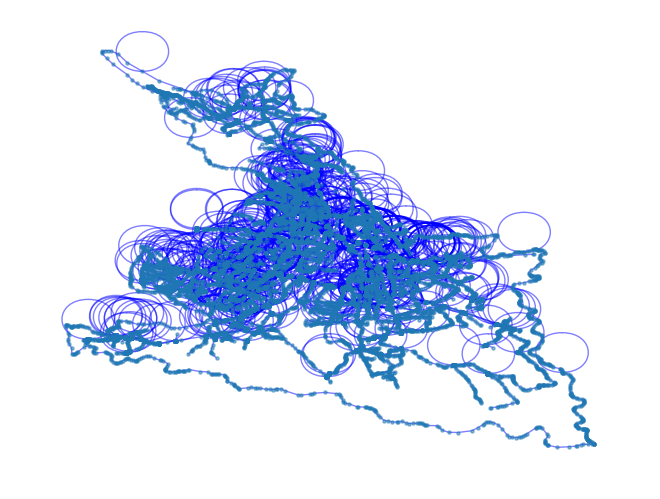

In [13]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Load GeoJSON file into a GeoDataFrame
file_path = "/content/drive/MyDrive/Network Analysis/waterpipelinegeo.geojson"
gdf = gpd.read_file(file_path)

# Explode MultiLineString geometries into individual LineString rows
exploded_gdf = gdf.explode()

# Extract LineString geometries
pipeline_segments = exploded_gdf[exploded_gdf["geometry"].geom_type == "LineString"]

# Create an empty NetworkX graph
G = nx.Graph()

# Add pipeline segments to the graph
for index, row in pipeline_segments.iterrows():
    print("\nProcessing row with index:", index)
    print("Geometry Type:", row["geometry"].geom_type)
    print("Geometry Info:", row["geometry"])

    # Debug: Print the first few characters of the geometry
    print("Geometry Data (Preview):", str(row["geometry"])[:100])

    if row["geometry"].geom_type == "LineString":
        line = row["geometry"]
        print("Processing LineString:", line)
        for i in range(len(line.coords) - 1):
            start_node = line.coords[i]
            end_node = line.coords[i + 1]
            G.add_edge(start_node, end_node)
            print("Adding edge between", start_node, "and", end_node)

# Perform network analysis using NetworkX functions
# For example:
# - Calculate basic metrics: nx.number_of_nodes(G), nx.number_of_edges(G), etc.
# - Find shortest paths: nx.shortest_path(G, source, target)
# - Compute centrality measures: nx.betweenness_centrality(G), nx.closeness_centrality(G), etc.

# Visualize the pipeline network
pos = {node: (node[0], node[1]) for node in G.nodes()}
nx.draw(G, pos, with_labels=False, node_size=5, edge_color='blue', alpha=0.5)
plt.show()
